# Data Description:

The data is split into two datasets, each corresponding to either the control group (Control_group_responses.csv), or the effect group (Adjustment_group_responses.csv). The effect in question is an adjustment to the wording of the items of the Anatomic subscale of the Generalized Autogynephilia Scale [citation]. Each subject was randonly assigned to either the control group or the effect group using a Google Apps Script which, upon clicking the link, would automatically use a random number generator to randomly render either the Google Form with the unadjusted items, or the Google Form with the adjusted items. 

The data is from an online convenience sample. The link to the Google Apps Script was shared on several sites such as Twitter, and Subreddits of various topics, tags on tumblr etc. A list of each exact platform/community where the link was posted, along with available details on the number of likes/impressions on the post will be made available in the additional materials. We did not ask respondents to specify where they found the survey, so we can't be sure where responses come from.

All subjects were required to indicate that they were 18 years or older, and that they consented to what was outlined in the Informed Consent Block.

# Measures:

Variable: (csv_column_label) (response type)

**Sex/Gender:** (sex_gender) (Multiple Choice)
Subjects were asked to select their sex/gender from a list of options, each specifying a gender identity and an indicator of assigned sex at birth. Additionally, subjects were allowed to select "other" and write in their own identity.

**Kinsey Scale:** (kinsey_scale) (7-Point Likert)
Subjects were asked to rate their sexual orientation from exclusively gynesexual to exclusively androsexual

**HRT:** (HRT) (binary response)
Subjects were asked whether or not they take cross-sex hormones for the purpose of gender/sex transition

**dimorphism:** (dimorphism) (7-point Likert)
Subjects were asked to rate their own subjective perception of their body as physically masculine or feminine

**sexual behavior:** (sexual_behavior) (Checklist)
Subjects were asked to specify what sex/gender (same list as Sex/Gender question) groups they have had sexual encounters with

**Erotic Self-Focus Questionnaire, Factor 1 - Arousal to Own Body/self:** (ESFQ_X; X = item number) (7-point Likert)
Subjets were administered a 20 question subscale of the Erotic Self-Focus Questionnaire reflecting the first factor of the full scale found by EFA (Evan Fertel, 2015).

**Generalized Autogynephilia Scale, Factor 1 - Anatomic Autogynephilia:** (AGP_X; X = item number) (5-point Likert)
Subjects were administered a 7 question subscale of the Generalized Autogynephilia scale, reflecting the first factor of the full scale found by EFA (Hsu Et al., 2015)

**Free Response:** (testimony) (qualitative, text)
Subjects were asked to describe how embodiment does or does not play a role in their sexuality

# Legend:

**Kinsey Scale:** 0 = gynesexual; 6 = androsexual; 3 = bisexual; missing data = Asexual

**dimorphism (self-rating of physical masculinity vs femininity):** 1 = highly masculine; 7 = highly feminine

**Scale Items listed at the bottom of the notebook**

# Imports
* Math (standard library)
* Pandas: for data manipulation
* NumPy: for custom implementation of statistical/mathematical processes
* SciPy: for correlation and t-testing used in Confirmatory analysis
* Statsmodels: for factor modeling used in exploratory analysis

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import math
from scipy import stats
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from numpy.typing import ArrayLike, NDArray

# Data Cleaning

1. loading data from csv to DataFrame

In [6]:
control_group = pd.read_csv('Control_group_response.csv')
effect_group = pd.read_csv('Adjustment_group_responses.csv')

In [7]:
control_group

,Timestamp,18_plus,consent,sex_gender,kinsey_scale,HRT,dimorphism,sexual_behavior,ESFQ_1,ESFQ_2,...,ESFQ_20,ESFQ_21,AGP_1,AGP_2,AGP_3,AGP_4,AGP_5,AGP_6,AGP_7,testimony
0,12/9/2023 21:15:27,Yes,I agree,Cisgender Man,3.0,No,2,Cisgender Women,2,3,...,4,4,4,4,4,5,4,2,4,NaN
1,12/10/2023 9:45:32,Yes,I agree,Non-Binary (Assigned Female at Birth),3.0,No,5,"Cisgender Women, Non-Binary (Assigned Female a...",1,1,...,2,4,2,2,1,1,1,2,1,NaN
2,12/11/2023 7:00:10,Yes,I agree,AFAB non labeled,4.0,No,5,"Transgender Men, Non-Binary (Assigned Female a...",1,1,...,5,5,4,1,3,1,1,3,1,NaN
3,12/11/2023 11:56:24,Yes,I agree,Transgender Man,NaN,Yes,6,NaN,1,1,...,5,5,1,2,2,1,1,3,1,NaN
4,12/11/2023 15:22:42,Yes,I agree,Cisgender Woman,1.0,No,6,"Cisgender Men, Cisgender Women",7,7,...,3,6,2,2,2,2,1,5,2,I wouldn’t say very much. I’m quite insecure a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,4/7/2024 17:45:00,Yes,I agree,Non-Binary (Assigned Male at Birth),3.0,No,3,"Cisgender Men, Cisgender Women, Non-Binary (As...",2,1,...,6,6,1,2,1,1,1,1,1,Feeling like you are sexy is a definite turn-o...
57,4/8/2024 1:04:50,Yes,I agree,Transgender Woman,3.0,Yes,5,Cisgender Men,2,2,...,2,3,2,2,2,2,2,3,1,If my body's gross then that's a turnoff. It k...
58,4/10/2024 21:24:56,Yes,I agree,Transgender Woman,0.0,Yes,7,"Cisgender Men, Cisgender Women",1,1,...,1,3,1,1,1,1,1,1,1,I want my body to be attractive to my partners...
59,4/17/2024 16:32:50,Yes,I agree,Transgender Man,4.0,No,5,NaN,1,2,...,1,5,1,1,1,3,3,4,3,NaN


2. Dropping rows where respondent indicated they were not 18+ (and thus the survey was terminated), and rows where the respondent indicated they did not consent to what was outlined in the Informed Consent block (and thus the survey was terminated).

In [8]:
control_group = control_group.drop(control_group[control_group['18_plus'] == 'No'].index)
control_group = control_group.drop(control_group[control_group['consent'] == 'I disagree'].index)

effect_group = effect_group.drop(effect_group[effect_group['18_plus'] == 'No'].index)
effect_group = effect_group.drop(effect_group[effect_group['consent'] == 'I disagree'].index)

3. marking the group subjects belong to, and then combining them into a single DataFrame\
control group = 0\
experimental group = 1

In [9]:
control_group['experimental_group'] = 0
effect_group['experimental_group'] = 1

combined_sample = pd.concat([control_group, effect_group])


# Preliminary Data Transformation

1. creating an alternative combined sample (deep copy) where the item level scores are standardized

In [10]:
std_combined_sample = combined_sample.copy(deep=True)

for col_name in combined_sample.columns:
    if 'ESF' in col_name:
        std_combined_sample[col_name] = (combined_sample[col_name] - combined_sample[col_name].mean()) / combined_sample[col_name].std()
    elif 'AGP' in col_name:
        std_combined_sample[col_name] = (combined_sample[col_name] - combined_sample[col_name].mean()) / combined_sample[col_name].std()

# Establishing Confirmatory Analysis

**Key Variables:**

- Factor Scores on the ESFQ arousal to own body/self subscale (via Evan Fertel, 2021 EFA)
- Factor Scores on the adjusted and unadjusted GAS Anatomic AGP subscale (via Hsu et al., 2015 EFA)
- Sex/Gender

### Hypothesis 1:

We hypothesized that the items assessing anatomic autogynephilia lack divergent validity w/ measures of ESF to a notable extent, even if they are not exatly identical. 

**r** = Pearson Correlation Coefficient between GAS AGP subscale (factor scored), and ESFQ arousal to own body/self subscale (factor scored)

- **H_0: r** <= 0.50
- **H_a: r** > 0.50

Pre-Registration suggests we will take any **r** > 0.5 as confirmation. This is not to say **r** > 0.5 is evidence they measure the same construct entirely, just that there may be signal contamination, given that ESF validated as a characteristic construct in heterosexual cis women, should theoretically be entirely uassociated with AGP. 

Note: Due to the non-representative sampling, there may be a misspecification in the model which should perhaps be a hierarchical model. For Confirmatory Analysis, we will stick to what is outlined in the pre-registration, and we will explore alternative modeling options in the Exploratory Analysis. 

### Hypothesis 2:

We hypothesized, based on past data from Veale et al., that the adjustment to the Anatomic AGP subscale would increase cis women's scores on the scale.

**X_1** = Mean of Cis Women in Effect group; 
**X_2** = Mean of Cis Women in Control Group

**d** = **X_1** - **X_2**; Mean difference between Control Cis Women, and Effect Cis Women.

- **H_0: d** <= 0
- **H_a: d** > 0

t-test for independent samples, unequal variances

### Hypothesis 3:

We hypothesized that the effect of the adjustments on subjects responses would be greater for cis women than for trans women, and thus bring their score closer together relative to controls

**d_1** = Mean Difference between trans vs cis women in control group;
**d_2** = Mean Difference between trans vs cis women in Effect group 

- **H_0: d_2** >= **d_1**
- **H_a: d_2** < **d_1**

t-test for independent samples, unequal variances


Hypothesis 2 and 3 will be treated as two tests of a single idea, and thus will be presented alongside a bonferonni correction

# Establishing Exploratory Analysis

- Check Model Assumptions w/ sensitivity analysis if possible
- Differential Item Functioning using Item Response Theory
- Zero-Order correlations between Kinsey & ESF/AGP scores
- Combining Effect and Control Data w/ adjustment
- Mixture Modeling of trans group on combined Effect and Control data




Factor Scores are to be computed based on the models specified in through EFA in prior research on Autogynephilia and Erotic Self-Focus Scales. This is to ensure our approach has optimal measurement validity. [source] have shown that using sum scores is equivalent to a latent variable model where all items have equal loading on the factor. They have also shown that if this model is used for inference when the true loadings do not match, there is a bias in the inference.

I neglected to specify in pre-registration which method would be used to compute factor scores, so take note of that. Regardless i've decided to use the Regression method from Thurstone (1935). Barlett's (1937) correction was considered, however it relies on the residual covariance matrix, which is not available in either case.

### Factor Regression

f<sub>i</sub><sub>1</sub> = The Score for the ith subject on the first factor\
x<sub>ij</sub> = The ith subject's standardized score on the jth item of the scale\
**w**<sub></sub> = **R**<sup>-1</sup>**$\lambda$**

<center>
f<sub>i</sub><sub>1</sub> = w<sub>11</sub>x<sub>i1</sub> + w<sub>12</sub>x<sub>i2</sub> + ... + w<sub>1p</sub>x<sub>in</sub>

or 

f<sub>i1</sub> = $\sum_{n=j}^{p}$ w<sub>11</sub>x<sub>ij</sub>

or 

**f**<sub>1</sub> = **w**<sub>1</sub>**x**<sub>1</sub>
</center>

where: **R** = the correlaton matrix;   **F** = the factor loading matrix

(that means **R**<sup>-1</sup> is the partial correlation matrix)

In other words, the factor score for an individual is computed by a linear regression summing their standardized score on each item.
And weighting those scores by the ratio of global item correlation with the factor, to global correlation with the current item. In other words, the contribution of an item to a score on a given factor is proportional to how much that item's correlation with other items is explained by the correlation of the factor with those items. 

The Factor loadings are manually lifted from Hsu et al., (2015), and Fertel (2021). The empirical correlation matrices are not reported, so the implied covariance matrix **R** will be computed estimated on the reported factor loading matrix **$\lambda$** and the factor covariance matrix **$\Sigma$**<sub>ff</sub>

<center>

**R** = **$\Sigma$<sub>ff</sub>$\lambda$**<sup>T</sup>$\lambda$ + $\Psi$
</center>

# Manually Copied data related to factor structre from previous research

1. Copying data reported in Hsu et al., (2015)

In [11]:
# (Hsu et al., 2015)

agp_n = 261
agp_factor_cov_matrix = np.array([[1, 0.77, 0.63, 0.79, 0.76], # Anatomic AGP
                                   [0.77, 1, 0.59, 0.76, 0.83 ], # Transvestic AGP
                                   [0.63, 0.59, 1, 0.61, 0.7], # Physiologic AGP
                                   [0.79, 0.76, 0.61, 1, 0.76], # Interpersonal AGP
                                   [0.76, 0.83, 0.70, 0.76, 1]]) # Behavioral AGP
# [[Anatomic AGP], [Transvestic AGP], [Physiologic AGP], [Interpersonal AGP], [Behavioral AGP]]

#                                f1    f2   f3    f4   f5
agp_loading_matrix = np.array([[.91, -.13, .07, -.06, .07], # Q2
                               [.84, .12, .06, -.08, -.05], # Q3
                               [.82, -.17, -.05, .10, .18], # Q1
                               [.77, -.09, .14, -.01, .10], # Q6
                               [.76, .30, .02, .06, -.14],  # Q4
                               [.72, .27, -.04, .13, -.07], # Q5
                               [.65, .16, -.03, .17, .03],  # Q7
                               [.03, .91, .05, .02, .01],   # Q12
                               [.05, .88, -.01, .00, .07],  # Q14
                               [.19, .76, -.02, .00, .09],  # Q12
                               [-.13, .56, .17, .09, .31],  # Q19
                               [.06, -.09, .86, .03, .01],  # Q18
                               [.03, .08, .85, .05, -.08],  # Q15
                               [-.02, .09, .64, .03, .26],  # Q16
                               [-.08, .09, .06, .82, .00],  # Q11
                               [.10, -.23, .12, .76, -.06], # Q10
                               [.21, .12, -.20, .53, .22],  # Q8
                               [-.11, .37, .06, .40, .13],  # Q9
                               [.09, .02, .07, -.01, .77],  # Q20
                               [.03, .36, .04, .11, .61],   # Q21
                               [.17, .16, .01, .26, .49],   # Q22
                               [.09, .06, .36, -.07, .47]]) # Q17

anatomic_agp_loadings = np.array([0.82, 0.91, 0.84, 0.76, 0.72, 0.77, 0.65])

2. Copying Data reported in Fertel (2021)

In [12]:
# (Fertel, 2021)

esf_n = 269 + 286

esf_factor_cov_matrix = np.array([[1, 0.25, 0.32, 0.19], # Attraction to own body
                                   [0.25, 1, 0.19, 0.21], # Self/Own-Gender Focus vs. Partner/Other-Gender Focus
                                   [0.32, 0.19, 1, 0.27], # Self-Focused Arousal - Physical
                                   [0.19, 0.21, 0.27, 1]]) # Self-Focused Arousal - Mental
# [[Attraction to Own Body], [Self/Own-Gender Focus vs. Partner/Other-Gender Focus], [Self-Focused Arousal - Physical], [Self-Focused Arousal - Mental]]

#                                f1   f2   f3    f4  
esf_loading_matrix = np.array([[.74, .00, .08, -.11],  # I-1
                               [.73, -.02, .09, -.13], # I-2
                               [.73, -.04, .02, .12],  # I-3
                               [.67, .02, -.12, .09],  # I-4
                               [.66, .26, .08, -.05],  # I-5
                               [.66, .08, -.04, .04],  # I-6
                               [.64, -.01, -.12, .10], # I-7
                               [.60, .03, .00, .06],   # I-8
                               [.59, .05, -.03, .13],  # I-9
                               [.58, -.12, .14, .07],  # I-10
                               [.57, .09, .05, -.07],  # I-11
                               [.56, .32, .03, .00],   # I-12
                               [.52, -.06, .16, .30],  # I-13
                               [.50, .10, .05, .27],   # I-14
                               [.49, .17, .20, .16],   # I-15
                               [.45, .19, .08, .30],   # I-16
                               [.44, .14, .08, -.01],  # I-17
                               [.44, -.09, .16, .36],  # I-18
                               [.44, .13, .15, -.01],  # I-19
                               [.42, .03, .06, .16],   # I-20
                               [.40, .00, .21, .18],   # I-21
                               [-.12, .75, .02, .01],  # I-22
                               [-.06, .74, .04, -.01], # I-23
                               [.03, .73, .06, .11 ],  # I-24
                               [.07, .68, .01, .10],   # I-25
                               [.08, .67, -.07, .13],  # I-26
                               [.01, .66, .08, .05],   # I-27
                               [.08, .65, .01, .04],   # I-28
                               [.30, .61, .00, .02],   # I-29
                               [.08, .59, .02, .12],   # I-30
                               [.13, .43, -.03, .12],  # I-31
                               [.00, -.05, .87, .09],  # I-32
                               [-.01, .00, .84, .12],  # I-33
                               [-.01, .00, .84, .11],  # I-34
                               [.05, .01, .84, .09],   # I-35
                               [.18, .06, .69, .02],   # I-36
                               [-.14, .28, -.08, .69], # I-37
                               [-.02, -.03, .05, .69], # I-38
                               [.03, .13, .10, .64],   # I 39
                               [.10, .13, .09, .62],   # I-40
                               [-.09, .23, .01, .59],  # I-41
                               [.35, -.20, .02, .46],  # I-42
                               [.40, -.07, .17, .43],])# I-43

attraction_own_body_loadings = np.array([0.74, 0.73, 0.73, 0.67, 0.66, 0.66, 0.64, 0.60, 0.59, 0.58, 0.57,
                                         0.56, 0.52, 0.50, 0.49, 0.45, 0.44, 0.44, 0.44, 0.42, 0.40])

# h^2
esf_communalities = np.array([.45, .40, .37, .49, .44, .43, .58, .77, .76, .79, .79, .61, .48, .53, .53, .46, .45, .54, .26, .46, .49, .37, .40, .54, .51, .61, .54, .50, .56, .27, .47, .48, .34, .50, .31, .27, .39, .58, .56, .41, .57, .51, .62 ])



# Computing implied features of Fertel (2021) data

<center>

**R** = **$\Sigma$<sub>ff</sub>$\lambda$**<sup>T</sup>$\lambda$ + $\Psi$

and

**w**<sub></sub> = **R**<sup>-1</sup>**$\lambda$**
</center>

In [13]:
# Computing the Implied Correlation Matrix

esf_unique = np.diag(np.ones(43) - esf_communalities) # The Matrix phi of unique variance is 1 - communality
product = np.matmul(esf_loading_matrix, esf_factor_cov_matrix)
esf_implied_corr_matrix = np.matmul(product, np.transpose(esf_loading_matrix)) + esf_unique

# Computing the weights for Thurstones Regression method
esf_implied_partial_correlation_matrix = np.linalg.inv(esf_implied_corr_matrix) # the inverse of the correlation matrix is the partial correlation matrix

esf_weights = esf_implied_partial_correlation_matrix.dot(esf_loading_matrix[:, 0]) # weights are the dot product of the partial correlation matrix, and the loadings

# arousal to own body (AtOB)
atob_weights = esf_weights[0:21] # only obtaining the weights for the items that load onto the factor (pre-identified as the first 21 questions)

### Functon to compute the Arousal to Own Body (AtOB) factor score

<center>
f<sub>i</sub><sub>1</sub> = w<sub>11</sub>x<sub>i1</sub> + w<sub>12</sub>x<sub>i2</sub> + ... + w<sub>1p</sub>x<sub>in</sub>

or 

f<sub>i1</sub> = $\sum_{n=j}^{p}$ w<sub>11</sub>x<sub>ij</sub>

or 

**f**<sub>1</sub> = **w**<sub>1</sub>**x**<sub>1</sub>
</center>

In [14]:
def atob_factorscore(item_scores): # compute factor score for 'Arousal to Own Body' factor of the ESFQ
    item_scores = np.array(item_scores)
    return atob_weights.dot(item_scores)

def atob_weighted_sumscore(item_scores):
    item_scores = np.array(item_scores)
    return esf_loading_matrix[:, 0][0:21].dot(item_scores)

def atob_weighted_meanscore(item_scores):
    item_scores = np.array(item_scores)
    weighted = esf_loading_matrix[:, 0][0:21] * item_scores
    return np.mean(weighted)

def aagp_weighted_sumscore(item_scores):
    item_scores = np.array(item_scores)
    return agp_loading_matrix[:, 0][0:7].dot(item_scores)

In [15]:
def sum_score(df, subject_num, num_items, scale, weights):
    score = 0
    for i in range(1, num_items+1):
        col = f'{scale}_{i}'
        score = score + (df.iloc[subject_num][col] * weights[i-1])
    return score


Computing factor score for each subject, and creating two new columns of the standardized DataFrames for these non standardized factor scores

In [16]:
combined_sample_atob_factorscores = []
combined_sample_aagp_factorscores = []

for subject in std_combined_sample.iloc:
    atob_item_scores = []
    aagp_item_scores = []
    for col_name in std_combined_sample.columns:
        if 'ESF' in col_name:
            atob_item_scores.append(subject[col_name])
        elif 'AGP' in col_name:
            aagp_item_scores.append(subject[col_name])
    combined_sample_atob_factorscores.append(atob_factorscore(atob_item_scores))
    combined_sample_aagp_factorscores.append(aagp_weighted_sumscore(aagp_item_scores))


combined_sample_atob_factorscores = np.array(combined_sample_atob_factorscores)
combined_sample_aagp_factorscores = np.array(combined_sample_aagp_factorscores)

std_combined_sample['atob_factorscore'] = combined_sample_atob_factorscores
std_combined_sample['aagp_factorscore'] = combined_sample_aagp_factorscores

computing the standardized factor scores, and creating two new columns to contain them

In [17]:
std_combined_sample['atob_factorscore_std'] = (std_combined_sample['atob_factorscore'] - std_combined_sample['atob_factorscore'].mean()) / std_combined_sample['atob_factorscore'].std()
std_combined_sample['aagp_factorscore_std'] = (std_combined_sample['aagp_factorscore'] - std_combined_sample['aagp_factorscore'].mean()) / std_combined_sample['aagp_factorscore'].std() 


In [18]:
std_combined_sample.to_csv('std_combined_sample.csv')

# Conducting Confirmatory Analysis

## Hypothesis 1

1. computing the raw (attenuated) pearson correlation between the standardized aagp factor scores and the standardized atob factor scores

In [19]:
std_combined_women = std_combined_sample.loc[(std_combined_sample['sex_gender'] == 'Cisgender Woman') | (std_combined_sample['sex_gender'] == 'Transgender Woman')]

attenuated_convergence = sp.stats.pearsonr(std_combined_women['aagp_factorscore_std'], std_combined_women['atob_factorscore_std'])
attenuated_convergence

PearsonRResult(statistic=0.6272691797610425, pvalue=1.1396177565536931e-05)

In [20]:
# cronbach's alpha from Hsu et al (2014)
aagp_subscale_alpha = 0.94
# cronbach's alpha from Fertel (2021) (is this right? Should I be computing a cronbach's alpha for this sample???)
atob_subscale_alpha = 0.96

disattenuated_convergence = attenuated_convergence[0] / math.sqrt(aagp_subscale_alpha * atob_subscale_alpha)
disattenuated_convergence

0.6603199309519769

In [21]:
'{:f}'.format(attenuated_convergence[1])

'0.000011'

In [47]:
control_subsample = std_combined_sample.loc[std_combined_sample['experimental_group'] == 0]
effect_subsample = std_combined_sample.loc[std_combined_sample['experimental_group'] == 1]

control_cw = control_subsample.loc[control_subsample['sex_gender'] == 'Cisgender Woman']
control_tw = control_subsample.loc[control_subsample['sex_gender'] == 'Transgender Woman']

effect_cw = effect_subsample.loc[effect_subsample['sex_gender'] == 'Cisgender Woman']
effect_tw = effect_subsample.loc[effect_subsample['sex_gender'] == 'Transgender Woman']

tw = std_combined_sample.loc[std_combined_sample['sex_gender'] == 'Transgender Woman']
cw = std_combined_sample.loc[std_combined_sample['sex_gender'] == 'Cisgender Woman']
tm = std_combined_sample.loc[std_combined_sample['sex_gender'] == 'Transgender Man']
cm = std_combined_sample.loc[std_combined_sample['sex_gender'] == 'Cisgender Man']

std_control_women = control_subsample.loc[(control_subsample['sex_gender'] == 'Cisgender Woman') | (control_subsample['sex_gender'] == 'Transgender Woman')]
std_effect_women = effect_subsample.loc[(effect_subsample['sex_gender'] == 'Cisgender Woman') | (effect_subsample['sex_gender'] == 'Transgender Woman')]

In [23]:
tw_attenuated_convergence = sp.stats.pearsonr(tw['aagp_factorscore_std'], tw['atob_factorscore_std'])
cw_attenuated_convergence = sp.stats.pearsonr(cw['aagp_factorscore_std'], cw['atob_factorscore_std'])


print(f'convergence in cis women: {cw_attenuated_convergence[0] / math.sqrt(aagp_subscale_alpha * atob_subscale_alpha)}; (n={len(cw)})')
print(f'convergence in trans women: {tw_attenuated_convergence[0] / math.sqrt(aagp_subscale_alpha * atob_subscale_alpha)}; (n={len(tw)})')

convergence in cis women: 0.6458922469168241; (n=23)
convergence in trans women: 0.7918940689330523; (n=18)


### Exploratory - Which Items of the ESFQ - Arousal to Own Body factor are most correlated with the Anatomic AGP factorscore?

#### Combined Sample

In [24]:
item_labels = []
agp_labels = []

for i in range(1, 22):
    item_labels.append(f'ESFQ_{i}')

for i in range(1, 8):
    agp_labels.append(f'AGP_{i}')

for label in item_labels:
    attenuated_correlation = sp.stats.pearsonr(std_combined_women[label], std_combined_women['aagp_factorscore_std'])
    print(f'{label} X AGP Factorscore: {attenuated_correlation}')


ESFQ_1 X AGP Factorscore: PearsonRResult(statistic=0.3754474347385528, pvalue=0.015566688265237496)
ESFQ_2 X AGP Factorscore: PearsonRResult(statistic=0.40052617413020297, pvalue=0.009460516448688366)
ESFQ_3 X AGP Factorscore: PearsonRResult(statistic=0.5658282646800473, pvalue=0.00011551038558890542)
ESFQ_4 X AGP Factorscore: PearsonRResult(statistic=0.3925536526592701, pvalue=0.011127951084422917)
ESFQ_5 X AGP Factorscore: PearsonRResult(statistic=0.36222656379835927, pvalue=0.019948814233629417)
ESFQ_6 X AGP Factorscore: PearsonRResult(statistic=0.4363270630326158, pvalue=0.0043456464722252935)
ESFQ_7 X AGP Factorscore: PearsonRResult(statistic=0.4620226345113052, pvalue=0.0023578881649910567)
ESFQ_8 X AGP Factorscore: PearsonRResult(statistic=0.37790337932626805, pvalue=0.014849674612975754)
ESFQ_9 X AGP Factorscore: PearsonRResult(statistic=0.6951582153528297, pvalue=4.5697564659403065e-07)
ESFQ_10 X AGP Factorscore: PearsonRResult(statistic=0.4758157704449563, pvalue=0.0016648937

#### Control Group

In [25]:
for label in item_labels:
    attenuated_correlation = sp.stats.pearsonr(control_subsample[label], control_subsample['aagp_factorscore_std'])
    print(f'{label} X AGP Factorscore (CONTROL GROUP): {attenuated_correlation}')

ESFQ_1 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.36588739314863494, pvalue=0.0037335872665203054)
ESFQ_2 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.440604457499422, pvalue=0.0003798513830786761)
ESFQ_3 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.5029643982222652, pvalue=3.6104159277518534e-05)
ESFQ_4 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.46267723874274486, pvalue=0.0001738172947617828)
ESFQ_5 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.3771569958522316, pvalue=0.002733209284339503)
ESFQ_6 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.40289489786340865, pvalue=0.0012853454938842788)
ESFQ_7 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.5398078227006904, pvalue=7.136850025256718e-06)
ESFQ_8 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statistic=0.3239870499034715, pvalue=0.010859725932150217)
ESFQ_9 X AGP Factorscore (CONTROL GROUP): PearsonRResult(statis

#### Effect Group

In [26]:
for label in item_labels:
    attenuated_correlation = sp.stats.pearsonr(effect_subsample[label], effect_subsample['aagp_factorscore_std'])
    print(f'{label} X AGP Factorscore (EFFECT GROUP): {attenuated_correlation}')

ESFQ_1 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.3421393823969818, pvalue=0.02301121386064338)
ESFQ_2 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.29662956923238365, pvalue=0.05055608507005778)
ESFQ_3 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.5714241108696185, pvalue=5.093867739016206e-05)
ESFQ_4 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.6460306247889145, pvalue=2.1781410334021624e-06)
ESFQ_5 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.5478653425059279, pvalue=0.0001184214809787011)
ESFQ_6 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.432005324108299, pvalue=0.0034081980776854573)
ESFQ_7 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.496727521258412, pvalue=0.0006042279792066506)
ESFQ_8 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.5113915958804857, pvalue=0.0003886458363210602)
ESFQ_9 X AGP Factorscore (EFFECT GROUP): PearsonRResult(statistic=0.46328392

#### Trans Women

In [27]:
for label in item_labels:
    attenuated_correlation = sp.stats.pearsonr(tw[label], tw['aagp_factorscore_std'])
    print(f'{label} X AGP Factorscore (TRANS WOMEN): {attenuated_correlation}')

ESFQ_1 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.48102119186323367, pvalue=0.04329159421800723)
ESFQ_2 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.40243150664272725, pvalue=0.09778881120126805)
ESFQ_3 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.6261752822730131, pvalue=0.005433484183830757)
ESFQ_4 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.4211125017480643, pvalue=0.0817952672494634)
ESFQ_5 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.6387123305670396, pvalue=0.00432937490781329)
ESFQ_6 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.5121038850187064, pvalue=0.029802914577885385)
ESFQ_7 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.5544058736103987, pvalue=0.01695546349708962)
ESFQ_8 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.6596171562916802, pvalue=0.0028987866200197937)
ESFQ_9 X AGP Factorscore (TRANS WOMEN): PearsonRResult(statistic=0.6654823332297694, pvalue

#### Cis Women

In [28]:
for label in item_labels:
    attenuated_correlation = sp.stats.pearsonr(cw[label], cw['aagp_factorscore_std'])
    print(f'{label} X AGP Factorscore (CIS WOMEN): {attenuated_correlation}')

ESFQ_1 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.4073986471962797, pvalue=0.053667025082278164)
ESFQ_2 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.48958807009476657, pvalue=0.01773073142071097)
ESFQ_3 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.6136279858313052, pvalue=0.0018449226934440749)
ESFQ_4 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.451516813349385, pvalue=0.030563115960724592)
ESFQ_5 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.22988512762869398, pvalue=0.29132302556869166)
ESFQ_6 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.4419385131379431, pvalue=0.03474038141168914)
ESFQ_7 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.4094923764595752, pvalue=0.052331084956680395)
ESFQ_8 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.10402700519412958, pvalue=0.6366702571602307)
ESFQ_9 X AGP Factorscore (CIS WOMEN): PearsonRResult(statistic=0.7473378263602312, pvalue=4.16744241178884

### Exploratory - Differences between trans women and Cis Women on the correlations of AtOB-ESFQ Items with AAGP factor score. Combined Treatment-Control Sample


#### Trans - Cis

In [29]:
for label in item_labels:
    C_attenuated_correlation = sp.stats.pearsonr(cw[label], cw['aagp_factorscore_std'])
    T_attenuated_correlation = sp.stats.pearsonr(tw[label], tw['aagp_factorscore_std'])
    print(f'{label} diff: {T_attenuated_correlation[0] - C_attenuated_correlation[0]}')

ESFQ_1 diff: 0.07362254466695395
ESFQ_2 diff: -0.08715656345203932
ESFQ_3 diff: 0.012547296441707934
ESFQ_4 diff: -0.030404311601320677
ESFQ_5 diff: 0.4088272029383456
ESFQ_6 diff: 0.07016537188076333
ESFQ_7 diff: 0.14491349715082352
ESFQ_8 diff: 0.5555901510975506
ESFQ_9 diff: -0.08185549313046181
ESFQ_10 diff: 0.29323927826345586
ESFQ_11 diff: -0.03565049342124682
ESFQ_12 diff: 0.21205165620797067
ESFQ_13 diff: 0.5715680037302229
ESFQ_14 diff: 0.20859942069634396
ESFQ_15 diff: 0.2844223240341459
ESFQ_16 diff: 0.19991728966025896
ESFQ_17 diff: -0.21841889003387688
ESFQ_18 diff: 0.3066285234593682
ESFQ_19 diff: 0.2605347132316638
ESFQ_20 diff: -0.12518708415080193
ESFQ_21 diff: 0.3905394729848599


#### Differences between Effect and Control groups on the correlations of AtOB-ESFQ Items with AAGP factor score

In [30]:
for label in item_labels:
    Control_attenuated_correlation = sp.stats.pearsonr(control_subsample[label], control_subsample['aagp_factorscore_std'])
    Effect_attenuated_correlation = sp.stats.pearsonr(effect_subsample[label], effect_subsample['aagp_factorscore_std'])
    print(f'{label} diff: {Effect_attenuated_correlation[0] - Control_attenuated_correlation[0]} --------------- Effect: {Effect_attenuated_correlation[0]} Control: {Control_attenuated_correlation[0]}')

ESFQ_1 diff: -0.02374801075165317 --------------- Effect: 0.3421393823969818 Control: 0.36588739314863494
ESFQ_2 diff: -0.14397488826703836 --------------- Effect: 0.29662956923238365 Control: 0.440604457499422
ESFQ_3 diff: 0.06845971264735329 --------------- Effect: 0.5714241108696185 Control: 0.5029643982222652
ESFQ_4 diff: 0.18335338604616963 --------------- Effect: 0.6460306247889145 Control: 0.46267723874274486
ESFQ_5 diff: 0.17070834665369627 --------------- Effect: 0.5478653425059279 Control: 0.3771569958522316
ESFQ_6 diff: 0.029110426244890353 --------------- Effect: 0.432005324108299 Control: 0.40289489786340865
ESFQ_7 diff: -0.04308030144227837 --------------- Effect: 0.496727521258412 Control: 0.5398078227006904
ESFQ_8 diff: 0.18740454597701417 --------------- Effect: 0.5113915958804857 Control: 0.3239870499034715
ESFQ_9 diff: -0.268554210948535 --------------- Effect: 0.4632839259051798 Control: 0.7318381368537148
ESFQ_10 diff: -0.017164292919494895 --------------- Effect: 

#### Standardized Group means on each AtOB-ESFQ item, for each gender group of interest

In [31]:
for label in item_labels:
    print(f'{label} CW: {cw[label].mean()} -------- TrW: {tw[label].mean()} --------- TrM: {tm[label].mean()} --------- CM: {cm[label].mean()}')

ESFQ_1 CW: 0.35478468149289855 -------- TrW: -0.23041456931666898 --------- TrM: -0.45520927108902903 --------- CM: 0.28881232336405366
ESFQ_2 CW: 0.11786312993272931 -------- TrW: -0.35901294572101855 --------- TrM: -0.26583691637605084 --------- CM: 0.32620704648048326
ESFQ_3 CW: 0.18582929599851675 -------- TrW: -0.2791267814431781 --------- TrM: -0.20208074555586555 --------- CM: 0.28230433224002116
ESFQ_4 CW: 0.33538255793828664 -------- TrW: -0.1310841631680361 --------- TrM: -0.3251895586283973 --------- CM: 0.16966411754525101
ESFQ_5 CW: 0.23820045626443714 -------- TrW: -0.05905633202576017 --------- TrM: -0.40885152940910857 --------- CM: 0.08888076726284967
ESFQ_6 CW: 0.23842378608864262 -------- TrW: -0.12475389005033814 --------- TrM: -0.5044396423774544 --------- CM: -0.033959471015592976
ESFQ_7 CW: 0.34503858987275693 -------- TrW: 0.19041348477053688 --------- TrM: -0.4072970055405654 --------- CM: -0.21628952276723487
ESFQ_8 CW: 0.41786287156639207 -------- TrW: 0.3328

#### Standardized Group means on each AAGP item, for each gender group of interest


In [32]:
for label in agp_labels:
    print(f'{label} CW: {cw[label].mean()} -------- TrW: {tw[label].mean()} --------- TrM: {tm[label].mean()} --------- CM: {cm[label].mean()}')

AGP_1 CW: 0.14611087120032326 -------- TrW: 0.4657284019510304 --------- TrM: -0.7594721325933467 --------- CM: 0.2572821862440475
AGP_2 CW: 0.1443033402088908 -------- TrW: 0.40211465835577154 --------- TrM: -0.6873711228492696 --------- CM: 0.06043700779966457
AGP_3 CW: 0.19827042450070545 -------- TrW: 0.4328947239748821 --------- TrM: -0.6567546668523039 --------- CM: 0.06291025172714196
AGP_4 CW: 0.0827167066450695 -------- TrW: 0.43849452451982834 --------- TrM: -0.5448570407649128 --------- CM: -0.08219318318529086
AGP_5 CW: 0.09061051087551253 -------- TrW: 0.5137741814573336 --------- TrM: -0.5535735898800848 --------- CM: -0.1642315509618666
AGP_6 CW: 0.1744142712158486 -------- TrW: 0.36282474938111714 --------- TrM: -0.67343288052786 --------- CM: -0.0320180787739239
AGP_7 CW: 0.38125900955559344 -------- TrW: 0.48376230472242554 --------- TrM: -0.7486068576242602 --------- CM: -0.17784987317258139


In [83]:
for label in agp_labels:
    print(f'{label} (T - C) {tw[label].mean() - cw[label].mean()}')

AGP_1 (T - C) 0.3196175307507071
AGP_2 (T - C) 0.25781131814688074
AGP_3 (T - C) 0.23462429947417665
AGP_4 (T - C) 0.3557778178747588
AGP_5 (T - C) 0.423163670581821
AGP_6 (T - C) 0.18841047816526854
AGP_7 (T - C) 0.1025032951668321


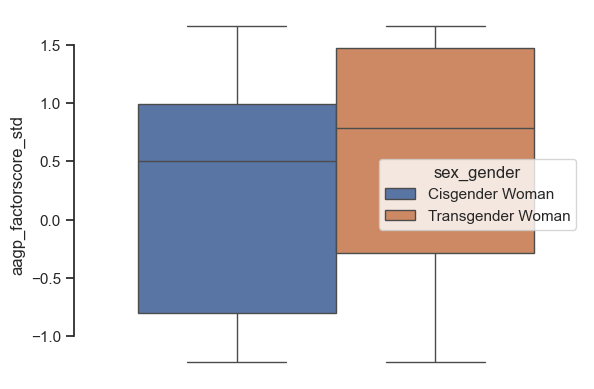

In [52]:
sns.set_theme(style='ticks')
sns.boxplot(data=std_combined_women, y=std_combined_women['aagp_factorscore_std'], hue='sex_gender')
sns.despine(offset=10, trim=True)

<Axes: ylabel='aagp_factorscore_std'>

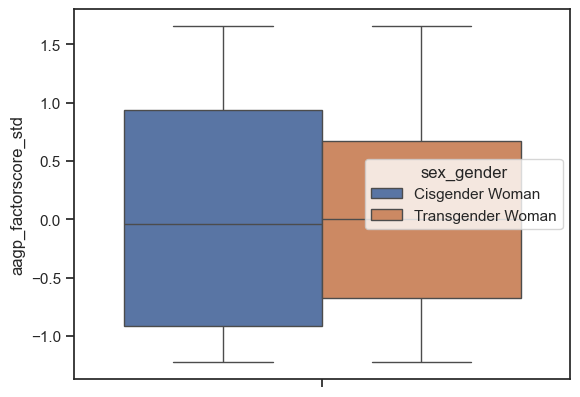

In [53]:
sns.boxplot(data=std_control_women, y=std_control_women['aagp_factorscore_std'], hue='sex_gender')

<Axes: ylabel='aagp_factorscore_std'>

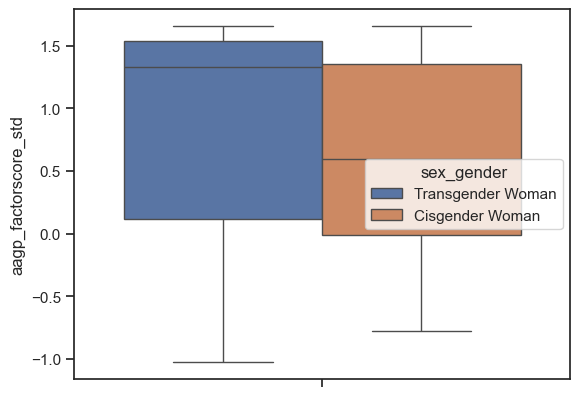

In [54]:
sns.boxplot(data=std_effect_women, y=std_effect_women['aagp_factorscore_std'], hue='sex_gender')

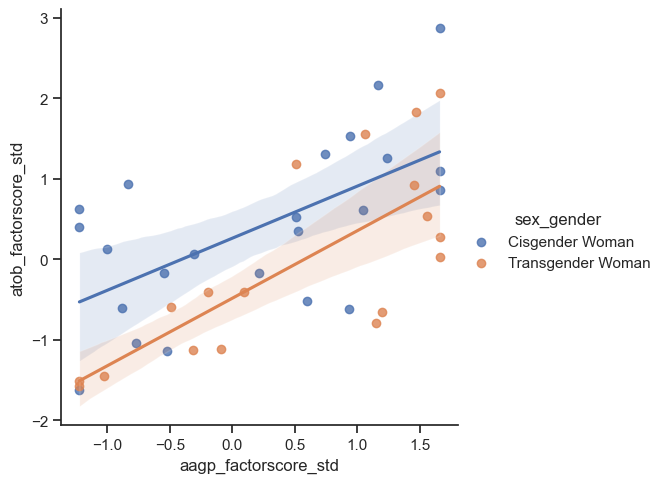

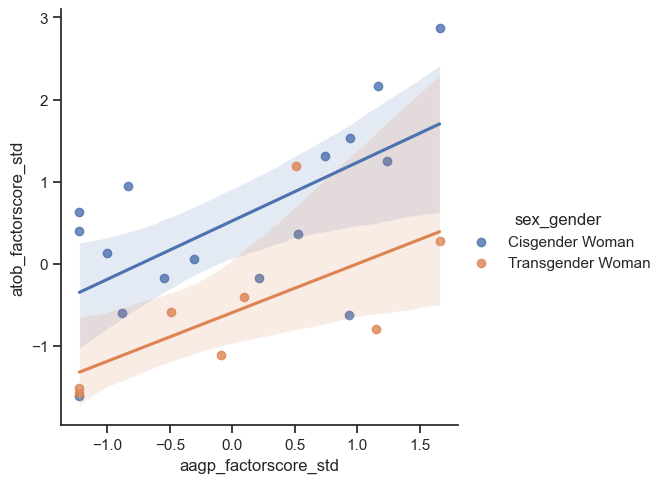

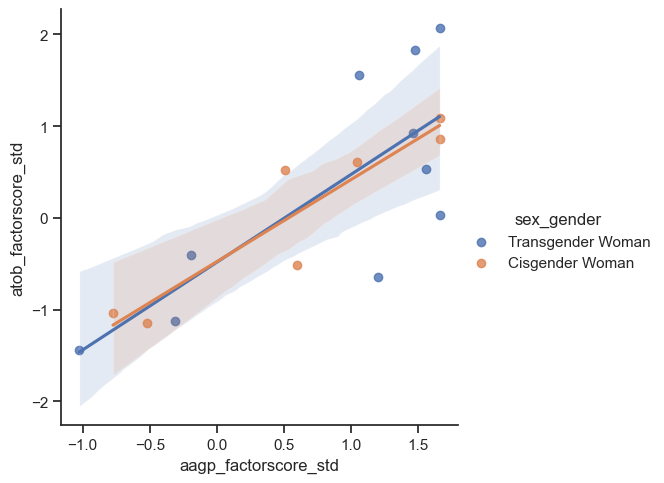

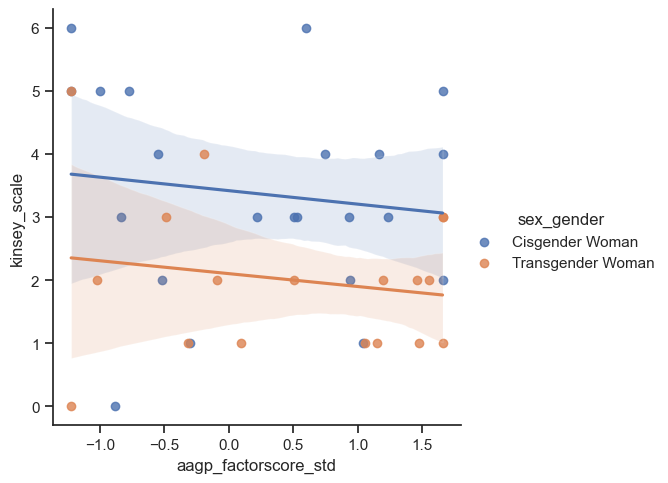

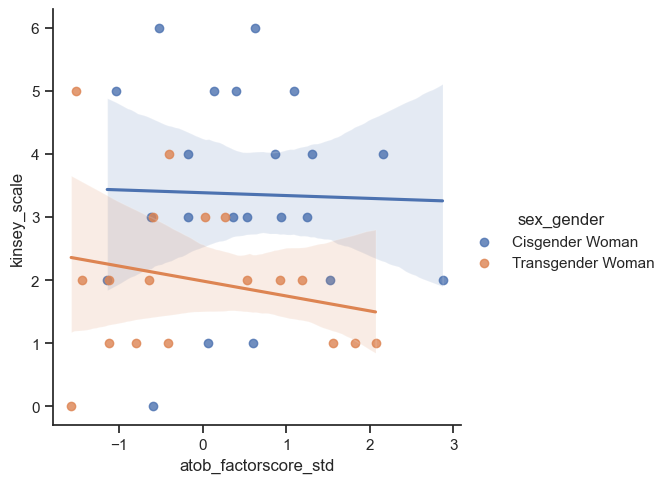

In [84]:
sns.lmplot(data=std_combined_women, x='aagp_factorscore_std', y='atob_factorscore_std', hue='sex_gender')
sns.lmplot(data=std_control_women, x='aagp_factorscore_std', y='atob_factorscore_std', hue='sex_gender')
sns.lmplot(data=std_effect_women, x='aagp_factorscore_std', y='atob_factorscore_std', hue='sex_gender')
sns.lmplot(data=std_combined_women, x='aagp_factorscore_std', y='kinsey_scale', hue='sex_gender')
sns.lmplot(data=std_combined_women, x='atob_factorscore_std', y='kinsey_scale', hue='sex_gender')




<Axes: xlabel='kinsey_scale', ylabel='aagp_factorscore_std'>

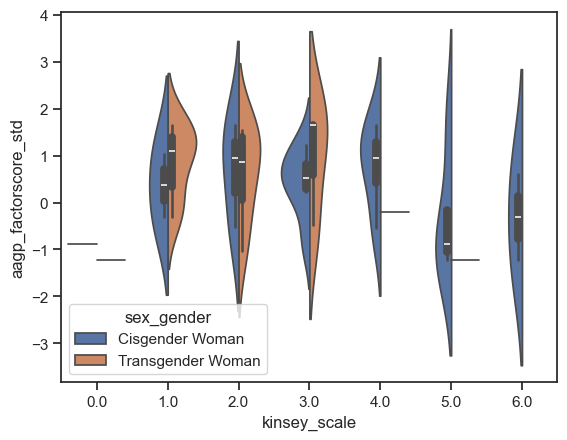

In [93]:
sns.violinplot(data=std_combined_women.dropna(subset='kinsey_scale'), x='kinsey_scale', y='aagp_factorscore_std', hue='sex_gender', split=True)

<Axes: xlabel='sex_gender', ylabel='aagp_factorscore_std'>

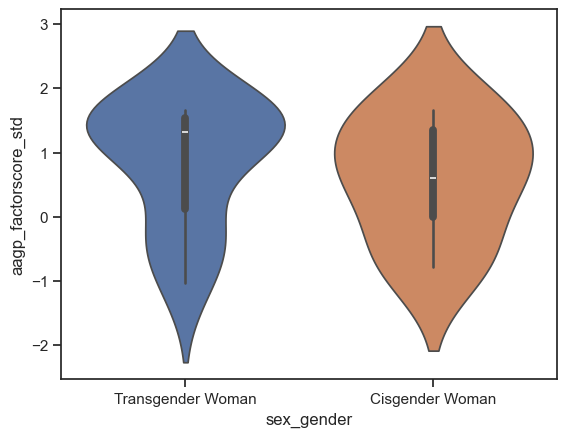

In [63]:
sns.violinplot(data=std_effect_women, x='sex_gender', y='aagp_factorscore_std', hue='sex_gender')

<Axes: xlabel='kinsey_scale', ylabel='Count'>

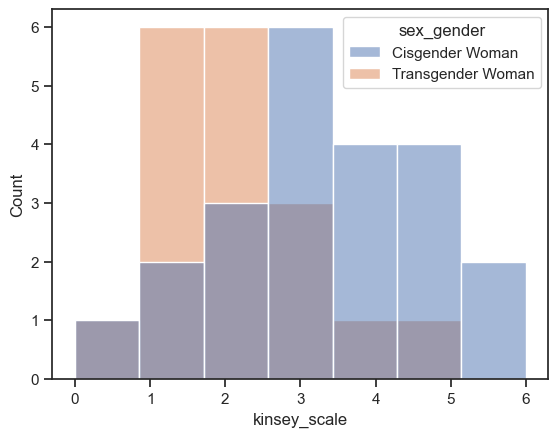

In [78]:
sns.histplot(data=std_combined_women.dropna(subset='kinsey_scale'), x='kinsey_scale', hue='sex_gender')

In [77]:
std_combined_women.dropna(subset='kinsey_scale')

,Timestamp,18_plus,consent,sex_gender,kinsey_scale,HRT,dimorphism,sexual_behavior,ESFQ_1,ESFQ_2,...,AGP_4,AGP_5,AGP_6,AGP_7,testimony,experimental_group,atob_factorscore,aagp_factorscore,atob_factorscore_std,aagp_factorscore_std
4,12/11/2023 15:22:42,Yes,I agree,Cisgender Woman,1.0,No,6.0,"Cisgender Men, Cisgender Women",2.158029,1.930455,...,-0.439498,-1.042021,1.530970,-0.373538,I wouldn’t say very much. I’m quite insecure a...,0,0.070640,-1.487758,0.060720,-0.304471
5,12/11/2023 16:48:02,Yes,I agree,Cisgender Woman,3.0,No,6.0,NaN,1.652241,1.451264,...,0.824811,0.911768,1.530970,1.555388,NaN,0,1.458074,6.029303,1.253321,1.233902
9,12/11/2023 16:59:22,Yes,I agree,Cisgender Woman,3.0,No,7.0,"Cisgender Men, Cisgender Women",1.146453,1.451264,...,-1.071653,-1.042021,-1.182141,0.269437,"I did not fantasize sexually about my body, li...",0,1.093785,-4.091727,0.940188,-0.837375
13,12/15/2023 12:37:02,Yes,I agree,Cisgender Woman,4.0,No,6.0,"Cisgender Men, Non-Binary (Assigned Male at Bi...",1.146453,0.492882,...,0.824811,0.260505,0.174414,0.912412,"I am uncomfortable with my body image so, alon...",0,1.523468,3.641195,1.309531,0.745174
14,12/16/2023 18:45:54,Yes,I agree,Cisgender Woman,5.0,No,7.0,"Cisgender Men, Cisgender Women, Non-Binary (As...",-0.370911,-0.465500,...,-1.071653,-1.042021,-1.182141,-1.016513,I love the idea of my own body being turned on.,0,0.465019,-5.978273,0.399718,-1.223458
15,12/18/2023 16:26:34,Yes,I agree,Transgender Woman,1.0,Yes,5.0,NaN,-0.876699,-0.465500,...,0.824811,-0.390758,0.174414,0.269437,NaN,0,-0.476275,0.472611,-0.409393,0.096720
18,12/18/2023 22:29:41,Yes,I agree,Cisgender Woman,0.0,No,5.0,Cisgender Women,-0.876699,-0.944691,...,-1.071653,-1.042021,-0.503863,-1.016513,"At 66, I've settled into celibacy. Sex is som...",0,-0.697345,-4.326505,-0.599419,-0.885423
19,12/18/2023 22:34:20,Yes,I agree,Cisgender Woman,4.0,No,6.0,"Cisgender Men, Cisgender Women",0.640665,0.492882,...,-1.071653,-1.042021,-1.182141,1.555388,NaN,0,-0.201808,-2.686240,-0.173468,-0.549741
26,12/19/2023 8:33:28,Yes,I agree,Transgender Woman,3.0,No,3.0,Cisgender Women,-0.876699,-0.944691,...,1.456966,1.563031,1.530970,1.555388,NaN,0,0.316003,8.103305,0.271628,1.658348
30,12/20/2023 19:10:30,Yes,I agree,Transgender Woman,2.0,Yes,3.0,Cisgender Women,-0.876699,-0.944691,...,0.192657,-0.390758,0.174414,-0.373538,If my dyshoria is stronger and i feel more dis...,0,-1.301041,-0.432082,-1.118340,-0.088426


In [65]:
for label in agp_labels:
    attenuated_correlation = sp.stats.pearsonr(cw[label], cw['atob_factorscore_std'])
    print(f'{label} X ATOB Factorscore: {attenuated_correlation}')

AGP_1 X ATOB Factorscore: PearsonRResult(statistic=0.5669429888608712, pvalue=0.004788399225246719)
AGP_2 X ATOB Factorscore: PearsonRResult(statistic=0.601446906562784, pvalue=0.002399425381683064)
AGP_3 X ATOB Factorscore: PearsonRResult(statistic=0.6032773756178306, pvalue=0.0023080520647160182)
AGP_4 X ATOB Factorscore: PearsonRResult(statistic=0.6091100327641729, pvalue=0.002036297092675985)
AGP_5 X ATOB Factorscore: PearsonRResult(statistic=0.5374535641880419, pvalue=0.00817395507989865)
AGP_6 X ATOB Factorscore: PearsonRResult(statistic=0.4555016936431011, pvalue=0.028947545240848995)
AGP_7 X ATOB Factorscore: PearsonRResult(statistic=0.5118742566042978, pvalue=0.012530300841095094)


In [64]:
for label in agp_labels:
    attenuated_correlation = sp.stats.pearsonr(tw[label], tw['atob_factorscore_std'])
    print(f'{label} X ATOB Factorscore: {attenuated_correlation}')

AGP_1 X ATOB Factorscore: PearsonRResult(statistic=0.7846578048780134, pvalue=0.00011530447140365088)
AGP_2 X ATOB Factorscore: PearsonRResult(statistic=0.6849875013862705, pvalue=0.0017083621065287218)
AGP_3 X ATOB Factorscore: PearsonRResult(statistic=0.7394828936431513, pvalue=0.000452849775459727)
AGP_4 X ATOB Factorscore: PearsonRResult(statistic=0.5619955744970573, pvalue=0.015207726831855568)
AGP_5 X ATOB Factorscore: PearsonRResult(statistic=0.7112912636335392, pvalue=0.0009334697081473391)
AGP_6 X ATOB Factorscore: PearsonRResult(statistic=0.5371401392735988, pvalue=0.021523967346828883)
AGP_7 X ATOB Factorscore: PearsonRResult(statistic=0.8060739064477506, pvalue=5.363660683219075e-05)


In [ ]:
control_cw = control_group.loc[control_group['sex_gender'] == 'Cisgender Woman']
control_cw = control_cw.drop(control_cw[np.isnan(control_cw['kinsey_scale']) ].index)

effect_cw = effect_group.loc[effect_group['sex_gender'] == 'Cisgender Woman']
effect_cw = effect_cw.drop(effect_cw[np.isnan(effect_cw['kinsey_scale']) ].index)

control_tw = control_group.loc[control_group['sex_gender'] == 'Transgender Woman']
control_tw = control_tw.drop(control_tw[np.isnan(control_tw['kinsey_scale'])].index)

effect_tw = effect_group.loc[effect_group['sex_gender'] == 'Transgender Woman']
effect_tw = effect_tw.drop(effect_tw[np.isnan(effect_tw['kinsey_scale'])].index)

In [ ]:
control_cw_convergence = sp.stats.pearsonr(control_cw['Weighted_AGP'], control_cw['Weighted_ESF'])
control_cw_convergence

PearsonRResult(statistic=0.5803628219604468, pvalue=0.02331397376345811)

In [ ]:
control_cw_convergence = sp.stats.pearsonr(control_cw['Weighted_AGP'], control_cw['Weighted_ESF'])
effect_cw_convergence = sp.stats.pearsonr(effect_cw['Weighted_AGP'], effect_cw['Weighted_ESF'])

control_tw_convergence = sp.stats.pearsonr(control_tw['Weighted_AGP'], control_tw['Weighted_ESF'])
effect_tw_convergence = sp.stats.pearsonr(effect_tw['Weighted_AGP'], effect_tw['Weighted_ESF'])

print(f'Control Group convergence in cis women: {control_cw_convergence[0]}; (n={len(control_cw)})')
print(f'control Group convergence in trans women: {control_tw_convergence[0]}; (n={len(control_tw)})')
print(f'Adjustment Group convergence in cis women: {effect_cw_convergence[0]}; (n={len(effect_cw)})')
print(f'Adjustment Group convergence in trans women: {effect_tw_convergence[0]}; (n={len(effect_tw)})')

Control Group convergence in cis women: 0.5803628219604468; (n=15)
control Group convergence in trans women: 0.6572254252536502; (n=8)
Adjustment Group convergence in cis women: 0.9340498165703421; (n=7)
Adjustment Group convergence in trans women: 0.7923007272216167; (n=10)


(0.9340498165703421, 0.002070021535685586)

'in locals'